# Import MAGIC MAN!!!  FKA: MAGIC COMMAND 

In [65]:
%matplotlib notebook

#import dependencies 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy import stats
import statistics

In [66]:
#OPEN / READ CSV
charity_df = pd.read_csv("cleaned_data.csv")
charity_df.head()

,Unnamed: 0,Charity,ein,Mission,Cause,Category Name,Rating,State,Contributions
0,0,Mount Desert Island Biological Laboratory,10202467,The MDI Biological Laboratory is a rapidly gro...,"{'causeID': 35, 'causeName': 'Non-Medical Scie...",Research and Public Policy,92.61,ME,12924245.0
1,1,United Way of Eastern Maine,10211478,"Working with the communities we serve, the Uni...","{'causeID': 42, 'causeName': 'United Ways', 'c...",Community Development,81.84,ME,2438155.0
2,2,The Jackson Laboratory,10211513,"The Jackson Laboratory, founded in 1929, is an...","{'causeID': 14, 'causeName': 'Medical Research...",Health,93.16,ME,331241336.0
3,3,Maine Historical Society,10211530,"Founded in 1822, the Maine Historical Society ...","{'causeID': 6, 'causeName': 'Libraries, Histor...","Arts, Culture, Humanities",80.31,ME,2219692.0
4,4,Boys & Girls Clubs of Southern Maine,10211543,"For more than 100 years, Boys & Girls Clubs of...","{'causeID': 16, 'causeName': 'Youth Developmen...",Human Services,91.54,ME,3859985.0


In [67]:
#GATHER AVERAGE COUNTRIBUTIONS /  NUMBER OF CHARITIES PER STATE / AVG. RATING PER STATE
avg_cont = charity_df.groupby("State")["Contributions"].mean()
avg_charity_perState = charity_df.groupby("State")["Charity"].count()
avg_rating_perState = charity_df.groupby("State")["Rating"].mean()

#create dF for city name, avg fare, avg rides, #of drivers and city type
all_states = pd.DataFrame({"Average Contributions per State": avg_cont,
                          "Number of Charities per State": avg_charity_perState,
                          "Average Charity Rating per State": avg_rating_perState,
})

all_states = all_states.sort_values(by="Average Charity Rating per State")

all_states.style.format({"Average Contributions per State":"${:,.0f}", "Average Charity Rating per State":"{:,.2f}%"})



,Average Contributions per State,Number of Charities per State,Average Charity Rating per State
State,,,
SD,"$8,760,253",23,80.97%
AK,"$4,731,354",17,81.59%
AR,"$9,821,407",34,82.23%
MS,"$6,633,296",37,83.97%
RI,"$8,732,582",32,83.99%
AL,"$10,795,822",66,84.17%
LA,"$13,747,201",62,84.43%
WV,"$27,544,351",15,84.44%
PR,"$4,215,336",3,84.64%


# Average Ratings per State 

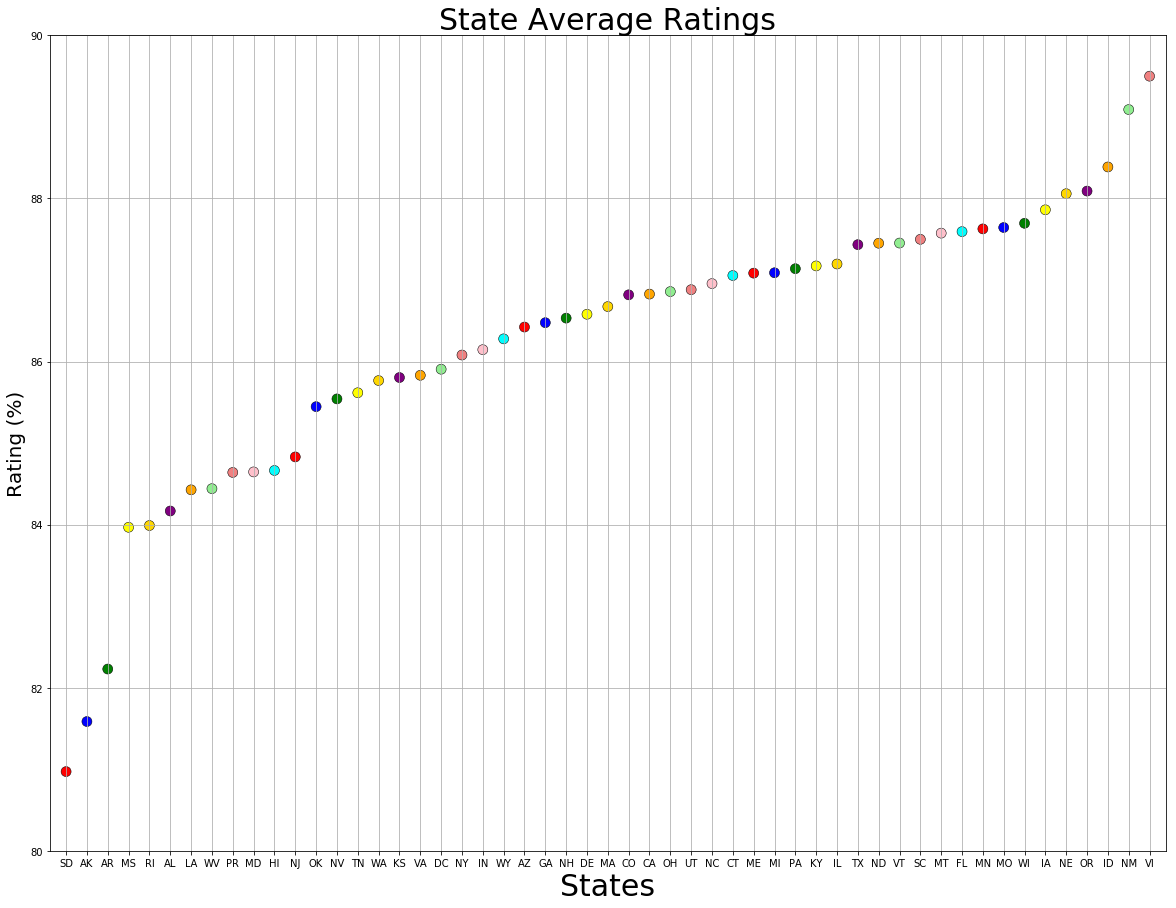

In [68]:
%matplotlib inline

#PLOT GRAPHS
state = ["AK","AL","AR","AZ","CA","CO","CT","DC","DE","FL","GA","HI","IA","ID","IL","IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS",
         "MT","NC","ND","NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","PR","RI","SC","SD","TN","TX","UT","VA","VI","VT","WA", "WI",
         "WV", "WY"]    
colors= ['red','blue','green','yellow','gold','purple','orange','lightgreen','lightcoral','pink','cyan']


plt.figure(figsize=(20, 15))
plt.scatter(all_states.index, all_states["Average Charity Rating per State"] ,color=colors, marker= 'o', edgecolors="black", 
            s=100, label ="States & Charities", alpha=1,linewidth=.5)
plt.title("State Average Ratings", size=30)
plt.xlabel("States",size=30)
plt.ylabel("Rating (%)", size=20)
plt.ylim(80, 90)
plt.grid()
plt.margins(0.015,0.03)
plt.savefig("png/Average Ratings per State.png")
plt.show()


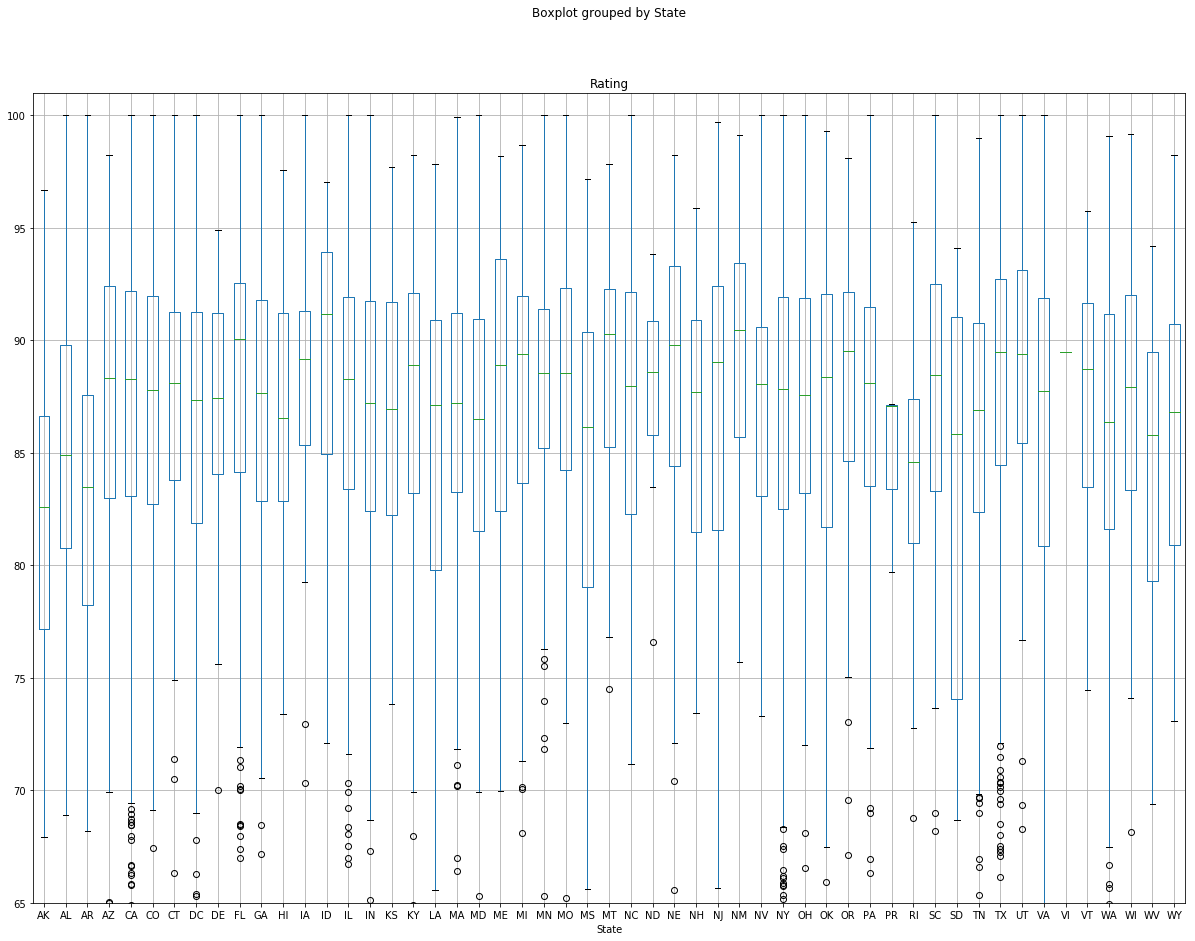

In [69]:
rating_boxplot = charity_df.boxplot(column="Rating", by="State", figsize=(20,15))
rating_boxplot.set_ylim(65, 101)
plt.savefig("png/Box_Plot Charity Ratings by State.png")

# Charities per State

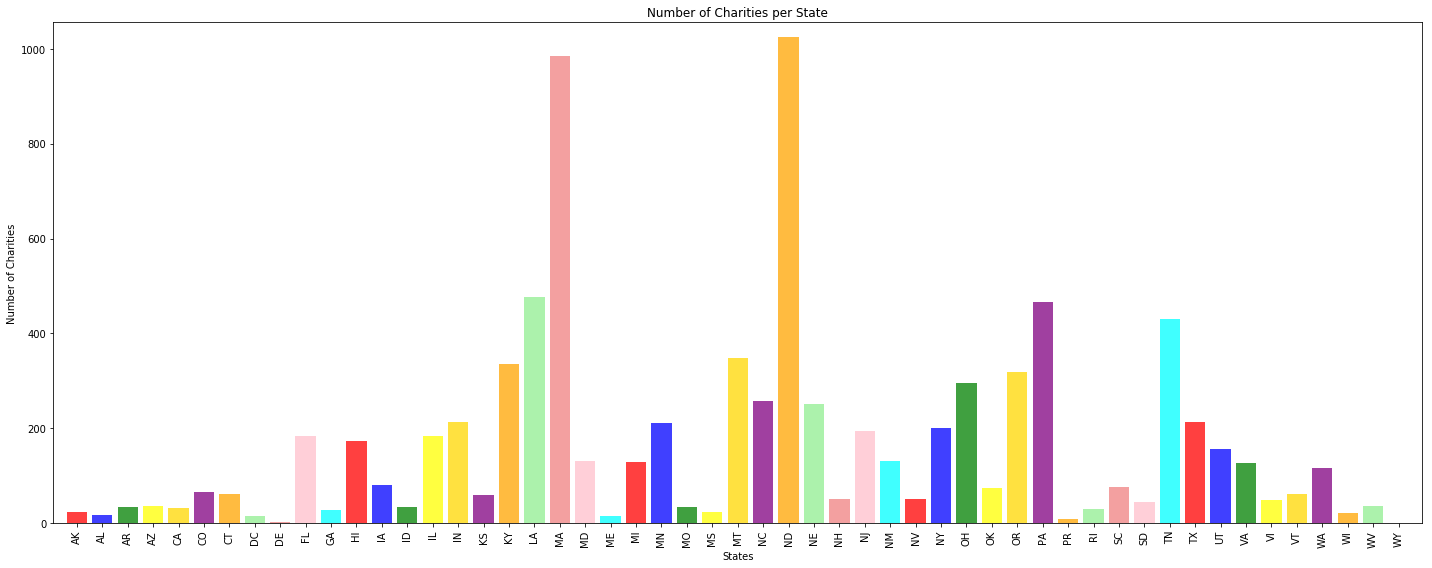

In [70]:
%matplotlib inline

# Set x axis and tick locations
x_axis = state
tick_locations = [value for value in x_axis]

colors= ['red','blue','green','yellow','gold','purple','orange','lightgreen','lightcoral','pink','cyan']

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,8))
plt.bar(x_axis, all_states["Number of Charities per State"], color=colors, alpha=0.75, align="center")
plt.xticks(tick_locations, state, rotation="vertical")
plt.title("Number of Charities per State")
plt.xlabel("States")
plt.ylabel("Number of Charities")
plt.tight_layout()
plt.margins(0.01,0.03)
plt.savefig("png/Count of Charities per State.png")
plt.show()


# Top States by:  Number of Charities /  Avg. Contributions / Avg. Rating

In [71]:
State = charity_df.groupby("State")
largest_char_State = pd.DataFrame({
    "States with Most Charities": State["Charity"].count(),
}).sort_values("States with Most Charities", ascending=False).head(5)

largest_char_State

,States with Most Charities
State,
CA,1025
NY,984
DC,477
TX,466
FL,430


In [72]:
#smallest count

State = charity_df.groupby("State")
small_char_State = pd.DataFrame({
    "States with Least Amount of Charities": State["Charity"].count(),
}).sort_values("States with Least Amount of Charities", ascending=True).head(5)

small_char_State

,States with Least Amount of Charities
State,
VI,1
PR,3
ND,8
WY,14
WV,15


In [73]:
arr = np.array(all_states['Average Contributions per State'])
arr

array([ 8760252.95652174,  4731354.11764706,  9821406.52941176,
        6633295.94444444,  8732581.65625   , 10795822.16666667,
       13747200.77419355, 27544351.4       ,  4215335.66666667,
       26208587.20555555, 27769482.57142857, 12308207.80588235,
       12870723.25      , 10162766.93939394, 23527114.        ,
       19908066.44339623, 10725852.94915254, 28795116.76119403,
       34982121.5665962 , 31417538.49081632, 11795244.82945736,
        7717885.57142857, 24983028.546875  , 27713047.27142857,
        9348636.44117647,  7913956.41666667, 22835450.48991355,
       15032724.48627451, 21898488.83170255, 23263734.69477912,
       12012422.28      , 16679313.2       , 36856156.08461539,
       19051641.34      , 32984384.375     , 14526909.12881356,
       13247438.05405405, 32715310.        , 21053612.51612903,
        6351984.375     ,  6828263.56666667,  9778770.4       ,
        6536909.37777778, 21096017.88111888, 15687050.01877934,
       18418090.36942675, 17367893.416  

In [74]:
# Find the median
mid = np.median(arr)
mid

14526909.12881356

In [75]:
# Use numpy to create quartiles
q1 = np.percentile(arr, 25)
q3 = np.percentile(arr,75)

In [76]:
# Print the quartiles
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")

Q1 is 9348636.44117647
Q3 is 22835450.489913546


In [77]:
# Calculate the interquartile range
iqr = (q3 - q1)
print("interquartile range:", iqr)

interquartile range: 13486814.048737075


In [78]:
# Check for any lower outliers
#arr[arr <= lower_boundary]

In [79]:
# Check for any upper outliers
#rr[arr >= upper_boundary]

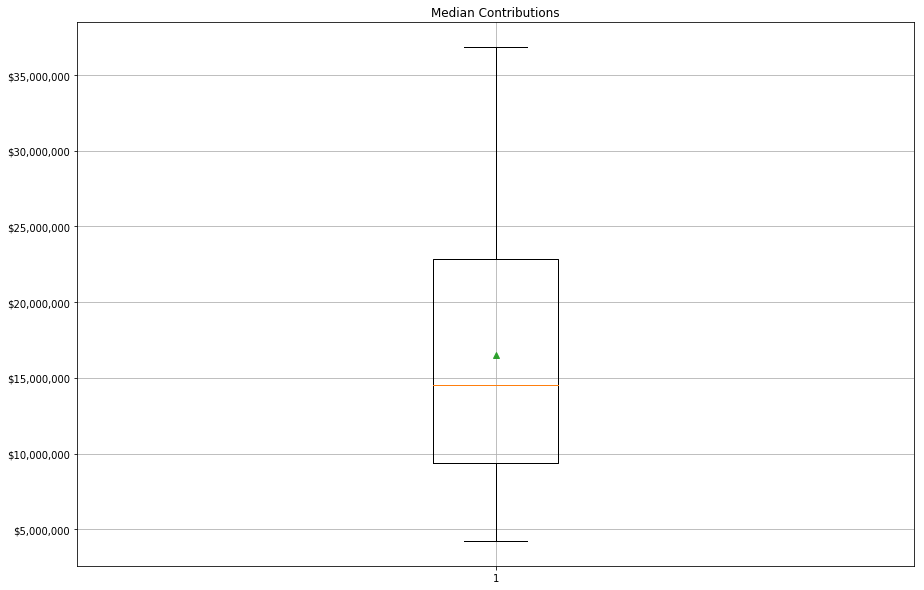

In [80]:
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter

# Create box plot
plt.figure(figsize=(15,10))
plt.boxplot(arr, showmeans=True)
plt.title("Median Contributions")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.grid()
plt.savefig("png/BoxPlot Median Contributions.png")
plt.show()


In [81]:
# largest by avg. contribution(income)

State = charity_df.groupby("State")
largest_avg_don = pd.DataFrame({
    "States with Highest Average Contributions": State["Contributions"].mean(),
}).sort_values("States with Highest Average Contributions", ascending=False).head(5)
largest_avg_don.style.format({"States with Highest Average Contributions": "${:,.0f}"})

,States with Highest Average Contributions
State,
CT,"$36,856,156"
DC,"$34,982,122"
MI,"$32,984,384"
IL,"$32,715,310"
NY,"$31,417,538"


In [82]:
# smaller by avg. contribution(income)

State = charity_df.groupby("State")
small_avg_don = pd.DataFrame({
    "States with Lowest Average Contributions": State["Contributions"].mean(),
}).sort_values("States with Lowest Average Contributions", ascending=True).head(5)
small_avg_don.style.format({"States with Lowest Average Contributions": "${:,.0f}"})

,States with Lowest Average Contributions
State,
PR,"$4,215,336"
AK,"$4,731,354"
VI,"$5,070,250"
ND,"$6,351,984"
MT,"$6,536,909"


In [83]:
#highest rated states

State = charity_df.groupby("State")
avg_rat_st = pd.DataFrame({
    "Highest Rated States": State["Rating"].mean(),
}).sort_values("Highest Rated States", ascending=False).head(5)
avg_rat_st.style.format({"Highest Rated States": "{:,.2f}%"})

,Highest Rated States
State,
VI,89.50%
NM,89.09%
ID,88.39%
OR,88.09%
NE,88.06%


In [84]:
#lowest rated states

State = charity_df.groupby("State")
avg_rat_st2 = pd.DataFrame({
    "Lowest Rated States": State["Rating"].mean(),
}).sort_values("Lowest Rated States", ascending=True).head(5)
avg_rat_st2.style.format({"Lowest Rated States": "{:,.2f}%"})

,Lowest Rated States
State,
SD,80.97%
AK,81.59%
AR,82.23%
MS,83.97%
RI,83.99%


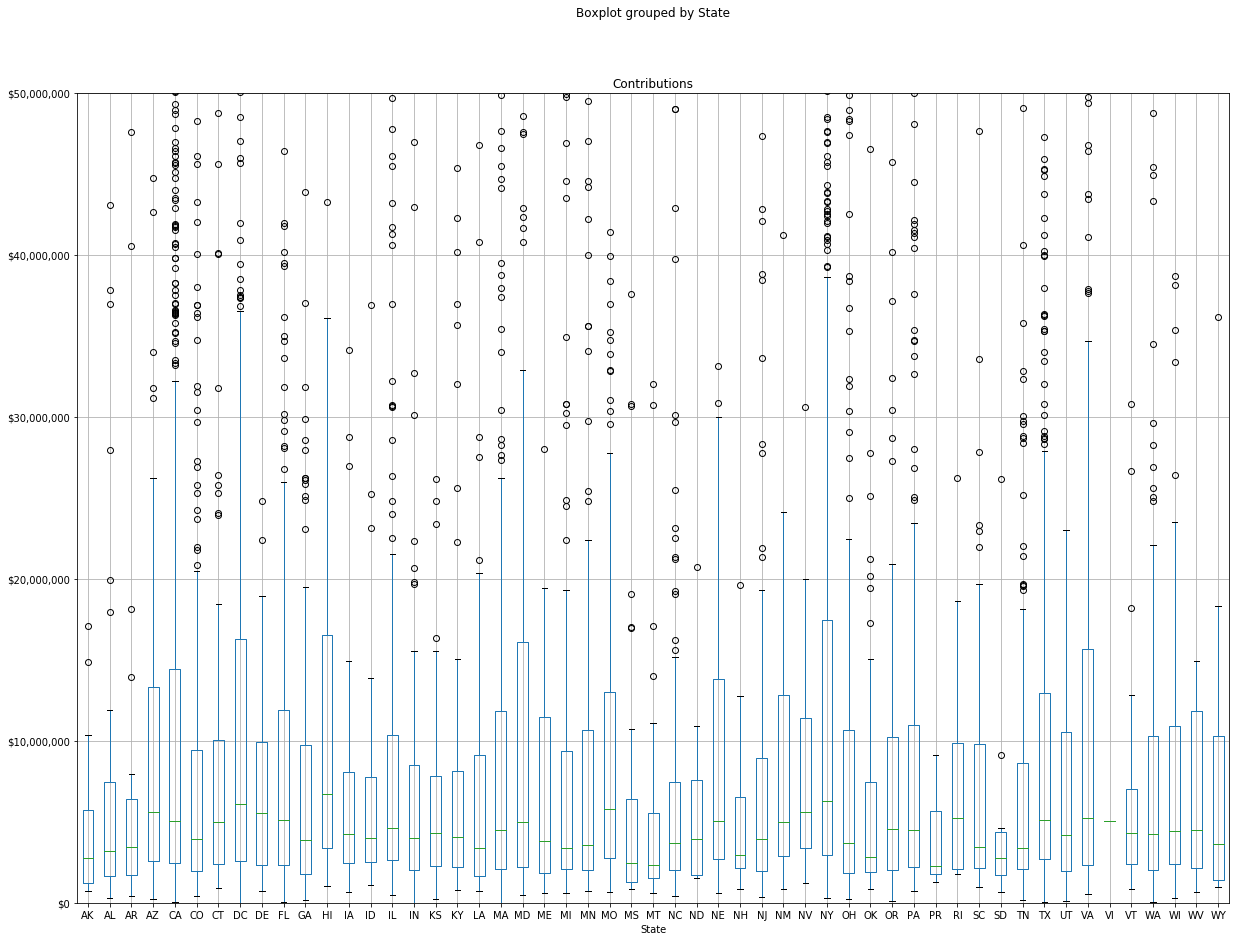

In [85]:
%matplotlib inline

from matplotlib.ticker import StrMethodFormatter

axes = charity_df.boxplot(column='Contributions', by="State", figsize=(20, 15))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
axes.set_ylim(0, 50000000)
plt.savefig("png/Contributions Groupe by State.png")

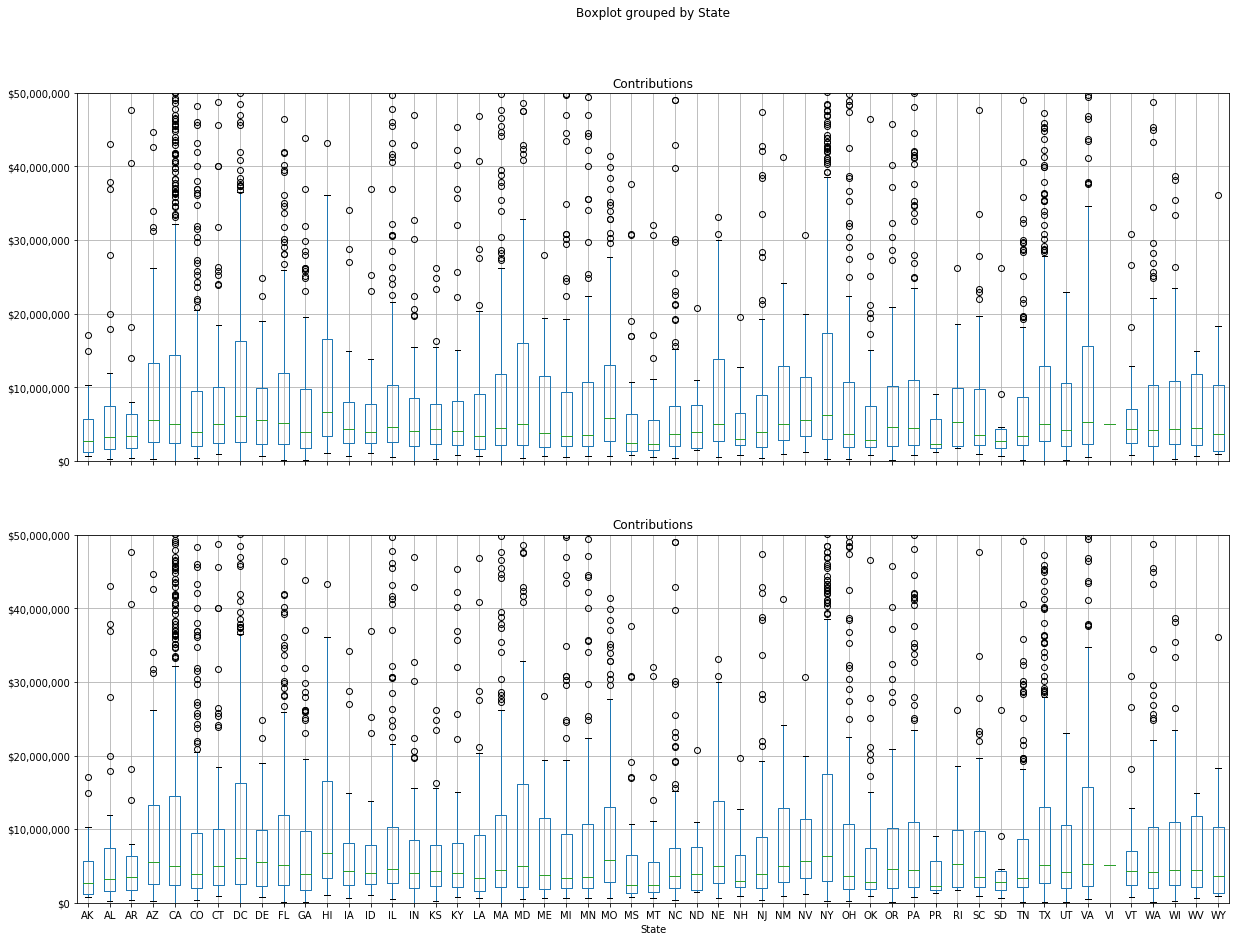

In [86]:
%matplotlib inline

from matplotlib.ticker import StrMethodFormatter

axes = charity_df.boxplot(column=['Contributions', 'Contributions'], by="State", figsize=(20, 15), layout=(2,1))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
axes[0].set_ylim(50000000, 100000000)
axes[1].set_ylim(0, 50000000)

plt.show()

In [87]:
plt.show()

(500000000, 4000000000)

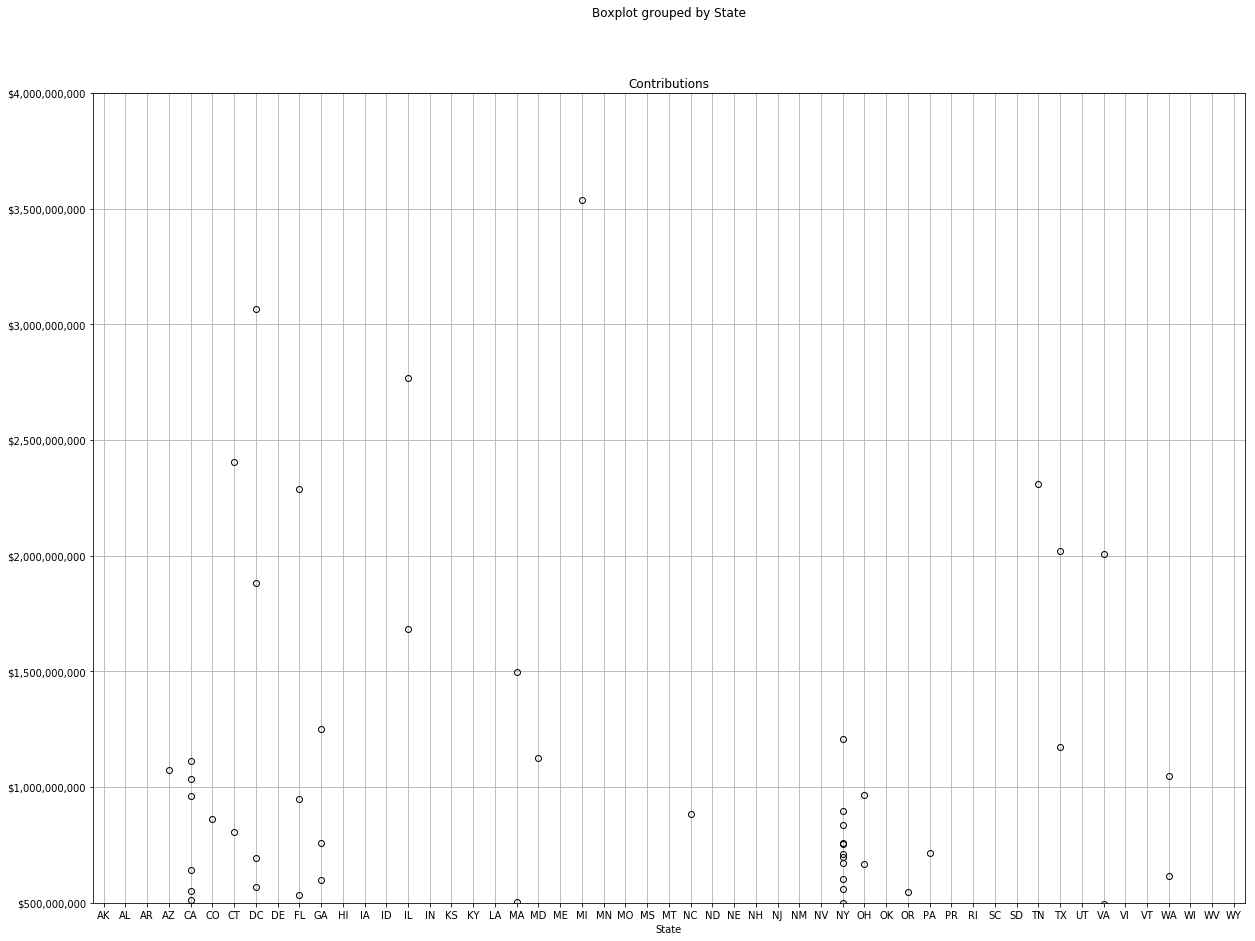

In [88]:
%matplotlib inline

from matplotlib.ticker import StrMethodFormatter

axes2 = charity_df.boxplot(column='Contributions', by="State", figsize=(20, 15))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
axes2.set_ylim(500000000, 4000000000)

NameError: name 'axes1' is not defined

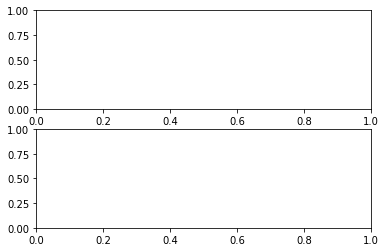

In [89]:
fig, axes = plt.subplots(2, 1)
axes[0] = axes1
axes[1] = axes2
axes[0]